In [1]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [2]:
# Plotting Set-Up
plt.rc('font', family = 'serif', size = 13, weight = "bold")
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('axes', linewidth = 2)
plt.rc('lines', linewidth = 3)
plt.rc('figure', figsize = (6, 6))
plt.rc('legend', fontsize = 13)

cm = plt.cm.get_cmap('tab20')

In [3]:
folder = "."
ver_num = 1

# load .npy data
X_train_strip = np.load(folder+"/X_train_strip_v{}.npy".format(ver_num))
X_test_strip = np.load(folder+"/X_test_strip_v{}.npy".format(ver_num))
y_train_strip = np.load(folder+"/y_train_strip_v{}.npy".format(ver_num))
y_test_strip = np.load(folder+"/y_test_strip_v{}.npy".format(ver_num))

print(X_train_strip.shape)
print(X_test_strip.shape)

(24533, 28, 28)
(4330, 28, 28)


## Dataset Distribution

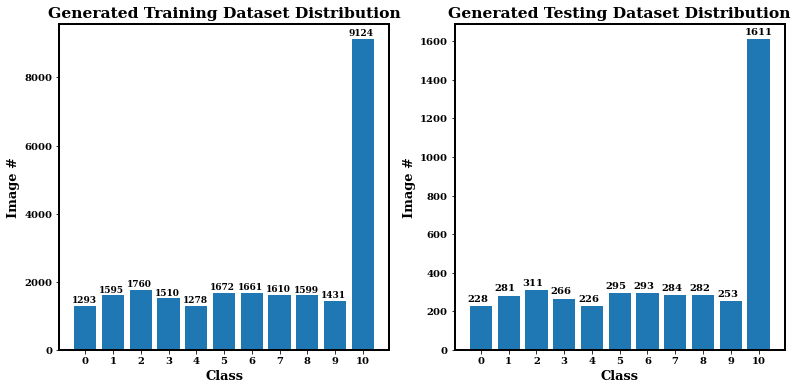

In [4]:
fig = plt.figure(figsize = (13, 6))
plt.subplot(1, 2, 1)
y , x = np.histogram(y_train_strip, bins = range(12))
plt.bar(range(11), y)
plt.title("Generated Training Dataset Distribution", weight = "bold")
plt.xlabel("Class", weight = "bold")
plt.xticks(range(11), weight = "bold")
plt.ylabel("Image #", weight = "bold")
for i, v, in enumerate(y):
    plt.text(i-.5, v+100, str(v), fontsize = 9)
plt.subplot(1, 2, 2)
y , x = np.histogram(y_test_strip, bins = range(12))
plt.bar(range(11), y)
plt.title("Generated Testing Dataset Distribution", weight = "bold")
plt.xlabel("Class", weight = "bold")
plt.xticks(range(11), weight = "bold")
plt.ylabel("Image #", weight = "bold")
for i, v, in enumerate(y):
    plt.text(i-.5, v+25, str(v), fontsize = 10)
plt.show()

In [5]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

X_train_mnist = X_train_mnist / 255; X_test_mnist = X_test_mnist / 255
X_train_mnist = X_train_mnist.astype(np.float32)
X_test_mnist = X_test_mnist.astype(np.float32)
X_train_strip = X_train_strip.astype(np.float32)
X_test_strip = X_test_strip.astype(np.float32)

X_train = np.concatenate((X_train_mnist, X_train_strip))
X_test = np.concatenate((X_test_mnist, X_test_strip))
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
y_train = np.concatenate((y_train_mnist, y_train_strip))
y_test = np.concatenate((y_test_mnist, y_test_strip))
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

num_classes = y_test.shape[1]
print("Num classes is " + str(num_classes))

(84533, 28, 28, 1)
(14330, 28, 28, 1)
(84533, 11)
(14330, 11)
Num classes is 11


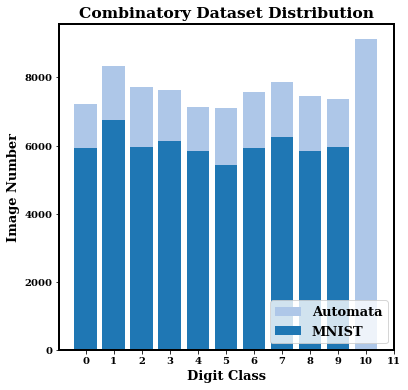

In [6]:
y , x = np.histogram(np.concatenate((y_train_mnist, y_train_strip)), bins = range(12))
plt.bar(range(11), y, color = cm.colors[1], label = "Automata")
y , x = np.histogram(y_train_mnist, bins = range(11))
plt.bar(range(10), y, color = cm.colors[0], label = "MNIST")
plt.title("Combinatory Dataset Distribution", weight = "bold")
plt.xlabel("Digit Class", weight = "bold")
plt.xticks(range(12), weight = "bold")
plt.ylabel("Image Number", weight = "bold")
plt.legend(loc=4)
plt.show()

In [7]:
model = load_model("Deep_Learning_Classifier_v3.h5")

## Model Structure

In [8]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

## Model Evaluation

### Evaluation on the Combinatory Dataset

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)

448/448 [==============================] - 2s 3ms/step - loss: 0.0645 - accuracy: 0.9805


In [10]:
accuracy

0.9805303812026978

### Evaluation on the Autamata  Dataset

In [11]:
X_test_automata = X_test_strip
X_test_automata = X_test_automata.reshape((X_test_automata.shape[0], 28, 28, 1)).astype('float32')
y_test_automata = y_test_strip
y_test_automata = np_utils.to_categorical(y_test_automata)

print(X_test_automata.shape)
print(y_test_automata.shape)

num_classes = y_test.shape[1]
print("Num classes is " + str(num_classes))

(4330, 28, 28, 1)
(4330, 11)
Num classes is 11


In [12]:
loss, accuracy = model.evaluate(X_test_automata, y_test_automata)

136/136 [==============================] - 0s 3ms/step - loss: 0.1406 - accuracy: 0.9564


In [13]:
accuracy

0.9563510417938232